## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  94.002638  1722.816185  0.591522  6.019375  1.547383
1  99.292532  1747.991261  0.824019  3.445648  1.555446
2  98.058624  1647.543574  0.019416  5.529475  0.137699
3  44.178304   894.980606  0.416800  8.687931  1.100746
4  99.849084   715.294881  0.977956  1.145677  1.399637


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.20249 | train_mse: 4.68941 | train_mae: 1.68585 |  0:00:00s
epoch 1  | loss: 0.80615 | train_mse: 4.78405 | train_mae: 1.58279 |  0:00:00s
epoch 2  | loss: 1.01741 | train_mse: 3.34905 | train_mae: 1.36922 |  0:00:00s


epoch 3  | loss: 0.79115 | train_mse: 2.78727 | train_mae: 1.31177 |  0:00:00s


epoch 4  | loss: 0.62073 | train_mse: 2.26632 | train_mae: 1.1397  |  0:00:00s
epoch 5  | loss: 0.64792 | train_mse: 1.33407 | train_mae: 0.83856 |  0:00:00s
epoch 6  | loss: 0.50638 | train_mse: 1.62817 | train_mae: 0.9781  |  0:00:00s


epoch 7  | loss: 0.66308 | train_mse: 1.77548 | train_mae: 0.99611 |  0:00:01s
epoch 8  | loss: 0.57551 | train_mse: 1.17502 | train_mae: 0.80563 |  0:00:01s
epoch 9  | loss: 0.41442 | train_mse: 1.15174 | train_mae: 0.81867 |  0:00:01s
epoch 10 | loss: 0.62497 | train_mse: 1.22786 | train_mae: 0.83165 |  0:00:01s


epoch 11 | loss: 0.55588 | train_mse: 1.07108 | train_mae: 0.7792  |  0:00:01s
epoch 12 | loss: 0.52416 | train_mse: 0.7951  | train_mae: 0.67354 |  0:00:01s
epoch 13 | loss: 0.44694 | train_mse: 0.61751 | train_mae: 0.57614 |  0:00:01s


epoch 14 | loss: 0.40878 | train_mse: 0.76491 | train_mae: 0.6179  |  0:00:01s
epoch 15 | loss: 0.45533 | train_mse: 0.79669 | train_mae: 0.64448 |  0:00:01s
epoch 16 | loss: 0.3147  | train_mse: 0.68336 | train_mae: 0.60305 |  0:00:01s


epoch 17 | loss: 0.43932 | train_mse: 0.43523 | train_mae: 0.51658 |  0:00:01s
epoch 18 | loss: 0.61709 | train_mse: 0.49354 | train_mae: 0.47703 |  0:00:01s
epoch 19 | loss: 0.54048 | train_mse: 0.43439 | train_mae: 0.50622 |  0:00:01s


epoch 20 | loss: 0.46481 | train_mse: 0.57778 | train_mae: 0.56426 |  0:00:01s
epoch 21 | loss: 0.31816 | train_mse: 0.66824 | train_mae: 0.58534 |  0:00:01s
epoch 22 | loss: 0.36506 | train_mse: 0.49144 | train_mae: 0.50602 |  0:00:02s
epoch 23 | loss: 0.44922 | train_mse: 0.49975 | train_mae: 0.50264 |  0:00:02s


epoch 24 | loss: 0.37348 | train_mse: 0.34666 | train_mae: 0.45985 |  0:00:02s
epoch 25 | loss: 0.41189 | train_mse: 0.32564 | train_mae: 0.44864 |  0:00:02s
epoch 26 | loss: 0.44531 | train_mse: 0.3925  | train_mae: 0.46283 |  0:00:02s
epoch 27 | loss: 0.425   | train_mse: 0.39207 | train_mae: 0.47569 |  0:00:02s


epoch 28 | loss: 0.36217 | train_mse: 0.42555 | train_mae: 0.47863 |  0:00:02s
epoch 29 | loss: 0.45243 | train_mse: 0.50102 | train_mae: 0.47081 |  0:00:02s
epoch 30 | loss: 0.35696 | train_mse: 0.54592 | train_mae: 0.45599 |  0:00:02s


epoch 31 | loss: 0.23755 | train_mse: 0.61309 | train_mae: 0.4416  |  0:00:02s
epoch 32 | loss: 0.30602 | train_mse: 0.60054 | train_mae: 0.43351 |  0:00:02s
epoch 33 | loss: 0.35535 | train_mse: 0.3701  | train_mae: 0.385   |  0:00:02s


epoch 34 | loss: 0.22609 | train_mse: 0.27785 | train_mae: 0.37922 |  0:00:02s
epoch 35 | loss: 0.2141  | train_mse: 0.27481 | train_mae: 0.38789 |  0:00:03s
epoch 36 | loss: 0.26835 | train_mse: 0.31081 | train_mae: 0.41931 |  0:00:03s


epoch 37 | loss: 0.30996 | train_mse: 0.38981 | train_mae: 0.44848 |  0:00:03s
epoch 38 | loss: 0.31303 | train_mse: 0.43486 | train_mae: 0.43143 |  0:00:03s
epoch 39 | loss: 0.23493 | train_mse: 0.423   | train_mae: 0.44404 |  0:00:03s
epoch 40 | loss: 0.41113 | train_mse: 0.38149 | train_mae: 0.45085 |  0:00:03s


epoch 41 | loss: 0.36419 | train_mse: 0.5478  | train_mae: 0.50344 |  0:00:03s
epoch 42 | loss: 0.55458 | train_mse: 0.45516 | train_mae: 0.51039 |  0:00:03s
epoch 43 | loss: 0.52109 | train_mse: 0.37405 | train_mae: 0.47501 |  0:00:03s
epoch 44 | loss: 0.48843 | train_mse: 0.36784 | train_mae: 0.44372 |  0:00:03s


epoch 45 | loss: 0.34925 | train_mse: 0.30259 | train_mae: 0.40082 |  0:00:03s
epoch 46 | loss: 0.31523 | train_mse: 0.2571  | train_mae: 0.37084 |  0:00:03s
epoch 47 | loss: 0.2482  | train_mse: 0.24556 | train_mae: 0.36979 |  0:00:03s
epoch 48 | loss: 0.27913 | train_mse: 0.25838 | train_mae: 0.39259 |  0:00:03s


epoch 49 | loss: 0.20636 | train_mse: 0.27518 | train_mae: 0.40365 |  0:00:03s
epoch 50 | loss: 0.30114 | train_mse: 0.24939 | train_mae: 0.39465 |  0:00:04s
epoch 51 | loss: 0.36929 | train_mse: 0.26497 | train_mae: 0.39381 |  0:00:04s
epoch 52 | loss: 0.27145 | train_mse: 0.24915 | train_mae: 0.39869 |  0:00:04s


epoch 53 | loss: 0.24956 | train_mse: 0.2396  | train_mae: 0.3867  |  0:00:04s
epoch 54 | loss: 0.25416 | train_mse: 0.26188 | train_mae: 0.37887 |  0:00:04s
epoch 55 | loss: 0.24873 | train_mse: 0.36152 | train_mae: 0.41626 |  0:00:04s


epoch 56 | loss: 0.24329 | train_mse: 0.334   | train_mae: 0.41045 |  0:00:04s
epoch 57 | loss: 0.28005 | train_mse: 0.31365 | train_mae: 0.41369 |  0:00:04s
epoch 58 | loss: 0.27191 | train_mse: 0.29929 | train_mae: 0.40175 |  0:00:04s


epoch 59 | loss: 0.37487 | train_mse: 0.25417 | train_mae: 0.39032 |  0:00:04s
epoch 60 | loss: 0.31703 | train_mse: 0.22376 | train_mae: 0.36564 |  0:00:04s
epoch 61 | loss: 0.30496 | train_mse: 0.20835 | train_mae: 0.35802 |  0:00:04s


epoch 62 | loss: 0.22721 | train_mse: 0.19322 | train_mae: 0.3425  |  0:00:04s
epoch 63 | loss: 0.27109 | train_mse: 0.19683 | train_mae: 0.33688 |  0:00:05s
epoch 64 | loss: 0.40822 | train_mse: 0.22217 | train_mae: 0.34531 |  0:00:05s


epoch 65 | loss: 0.2534  | train_mse: 0.35859 | train_mae: 0.38662 |  0:00:05s
epoch 66 | loss: 0.32281 | train_mse: 0.32282 | train_mae: 0.38315 |  0:00:05s
epoch 67 | loss: 0.2246  | train_mse: 0.32225 | train_mae: 0.38306 |  0:00:05s


epoch 68 | loss: 0.34888 | train_mse: 0.37082 | train_mae: 0.40056 |  0:00:05s
epoch 69 | loss: 0.34316 | train_mse: 0.29325 | train_mae: 0.39009 |  0:00:05s


epoch 70 | loss: 0.29631 | train_mse: 0.28096 | train_mae: 0.40128 |  0:00:05s
epoch 71 | loss: 0.27205 | train_mse: 0.26973 | train_mae: 0.3855  |  0:00:05s
epoch 72 | loss: 0.2589  | train_mse: 0.25997 | train_mae: 0.36642 |  0:00:05s


epoch 73 | loss: 0.17689 | train_mse: 0.23235 | train_mae: 0.3681  |  0:00:05s
epoch 74 | loss: 0.179   | train_mse: 0.22852 | train_mae: 0.36915 |  0:00:05s
epoch 75 | loss: 0.22583 | train_mse: 0.19385 | train_mae: 0.34135 |  0:00:06s
epoch 76 | loss: 0.23199 | train_mse: 0.16848 | train_mae: 0.32054 |  0:00:06s


epoch 77 | loss: 0.26227 | train_mse: 0.16772 | train_mae: 0.31763 |  0:00:06s
epoch 78 | loss: 0.19858 | train_mse: 0.17821 | train_mae: 0.32739 |  0:00:06s
epoch 79 | loss: 0.20898 | train_mse: 0.18882 | train_mae: 0.34182 |  0:00:06s
epoch 80 | loss: 0.27635 | train_mse: 0.21363 | train_mae: 0.34738 |  0:00:06s


epoch 81 | loss: 0.18253 | train_mse: 0.20798 | train_mae: 0.32877 |  0:00:06s
epoch 82 | loss: 0.14562 | train_mse: 0.21406 | train_mae: 0.33476 |  0:00:06s
epoch 83 | loss: 0.18424 | train_mse: 0.19467 | train_mae: 0.33121 |  0:00:06s
epoch 84 | loss: 0.22871 | train_mse: 0.19071 | train_mae: 0.329   |  0:00:06s


epoch 85 | loss: 0.28514 | train_mse: 0.22571 | train_mae: 0.3482  |  0:00:06s
epoch 86 | loss: 0.23931 | train_mse: 0.20083 | train_mae: 0.33879 |  0:00:06s
epoch 87 | loss: 0.16855 | train_mse: 0.17657 | train_mae: 0.31339 |  0:00:06s
epoch 88 | loss: 0.2147  | train_mse: 0.16503 | train_mae: 0.31029 |  0:00:06s


epoch 89 | loss: 0.17634 | train_mse: 0.17343 | train_mae: 0.32411 |  0:00:06s
epoch 90 | loss: 0.19072 | train_mse: 0.18496 | train_mae: 0.33674 |  0:00:07s
epoch 91 | loss: 0.19694 | train_mse: 0.20438 | train_mae: 0.34615 |  0:00:07s
epoch 92 | loss: 0.2937  | train_mse: 0.22287 | train_mae: 0.35452 |  0:00:07s


epoch 93 | loss: 0.17054 | train_mse: 0.22291 | train_mae: 0.34627 |  0:00:07s
epoch 94 | loss: 0.22653 | train_mse: 0.20464 | train_mae: 0.34361 |  0:00:07s
epoch 95 | loss: 0.20571 | train_mse: 0.18379 | train_mae: 0.33629 |  0:00:07s
epoch 96 | loss: 0.32278 | train_mse: 0.16639 | train_mae: 0.33044 |  0:00:07s


epoch 97 | loss: 0.27027 | train_mse: 0.17913 | train_mae: 0.33955 |  0:00:07s
epoch 98 | loss: 0.16137 | train_mse: 0.1718  | train_mae: 0.32279 |  0:00:07s
epoch 99 | loss: 0.3882  | train_mse: 0.18832 | train_mae: 0.33713 |  0:00:07s
epoch 100| loss: 0.31091 | train_mse: 0.18124 | train_mae: 0.31944 |  0:00:07s


epoch 101| loss: 0.20614 | train_mse: 0.16811 | train_mae: 0.30556 |  0:00:07s
epoch 102| loss: 0.24863 | train_mse: 0.1464  | train_mae: 0.28318 |  0:00:07s
epoch 103| loss: 0.19182 | train_mse: 0.16732 | train_mae: 0.30381 |  0:00:07s


epoch 104| loss: 0.27994 | train_mse: 0.16181 | train_mae: 0.30274 |  0:00:07s
epoch 105| loss: 0.30095 | train_mse: 0.20164 | train_mae: 0.30647 |  0:00:08s
epoch 106| loss: 0.21986 | train_mse: 0.17756 | train_mae: 0.30391 |  0:00:08s
epoch 107| loss: 0.18473 | train_mse: 0.15304 | train_mae: 0.30211 |  0:00:08s
epoch 108| loss: 0.16367 | train_mse: 0.16754 | train_mae: 0.30483 |  0:00:08s


epoch 109| loss: 0.23603 | train_mse: 0.19938 | train_mae: 0.3206  |  0:00:08s
epoch 110| loss: 0.28345 | train_mse: 0.21113 | train_mae: 0.32733 |  0:00:08s
epoch 111| loss: 0.23512 | train_mse: 0.19951 | train_mae: 0.32545 |  0:00:08s
epoch 112| loss: 0.19757 | train_mse: 0.16989 | train_mae: 0.30829 |  0:00:08s


epoch 113| loss: 0.21701 | train_mse: 0.15288 | train_mae: 0.30289 |  0:00:08s
epoch 114| loss: 0.17225 | train_mse: 0.14092 | train_mae: 0.28659 |  0:00:08s
epoch 115| loss: 0.24153 | train_mse: 0.14668 | train_mae: 0.2951  |  0:00:08s


epoch 116| loss: 0.25399 | train_mse: 0.14736 | train_mae: 0.29428 |  0:00:08s
epoch 117| loss: 0.17409 | train_mse: 0.14245 | train_mae: 0.28158 |  0:00:08s
epoch 118| loss: 0.19189 | train_mse: 0.14434 | train_mae: 0.28947 |  0:00:08s


epoch 119| loss: 0.20912 | train_mse: 0.14489 | train_mae: 0.29451 |  0:00:09s
epoch 120| loss: 0.24678 | train_mse: 0.1529  | train_mae: 0.30131 |  0:00:09s
epoch 121| loss: 0.26643 | train_mse: 0.16145 | train_mae: 0.30439 |  0:00:09s


epoch 122| loss: 0.20352 | train_mse: 0.16725 | train_mae: 0.30711 |  0:00:09s
epoch 123| loss: 0.21419 | train_mse: 0.16107 | train_mae: 0.30314 |  0:00:09s
epoch 124| loss: 0.18534 | train_mse: 0.1578  | train_mae: 0.30322 |  0:00:09s


epoch 125| loss: 0.24166 | train_mse: 0.16202 | train_mae: 0.29812 |  0:00:09s
epoch 126| loss: 0.14794 | train_mse: 0.19197 | train_mae: 0.31241 |  0:00:09s
epoch 127| loss: 0.17382 | train_mse: 0.19948 | train_mae: 0.31407 |  0:00:10s


epoch 128| loss: 0.15991 | train_mse: 0.16817 | train_mae: 0.29639 |  0:00:10s
epoch 129| loss: 0.16178 | train_mse: 0.14654 | train_mae: 0.27897 |  0:00:10s
epoch 130| loss: 0.1859  | train_mse: 0.14591 | train_mae: 0.28106 |  0:00:10s
epoch 131| loss: 0.18393 | train_mse: 0.14135 | train_mae: 0.27646 |  0:00:10s


epoch 132| loss: 0.1678  | train_mse: 0.137   | train_mae: 0.26664 |  0:00:10s
epoch 133| loss: 0.20022 | train_mse: 0.17761 | train_mae: 0.31153 |  0:00:10s
epoch 134| loss: 0.25273 | train_mse: 0.15081 | train_mae: 0.28446 |  0:00:10s
epoch 135| loss: 0.13942 | train_mse: 0.1424  | train_mae: 0.27195 |  0:00:10s


epoch 136| loss: 0.15554 | train_mse: 0.13094 | train_mae: 0.27124 |  0:00:10s
epoch 137| loss: 0.33501 | train_mse: 0.10987 | train_mae: 0.25775 |  0:00:10s
epoch 138| loss: 0.24179 | train_mse: 0.11274 | train_mae: 0.26619 |  0:00:10s


epoch 139| loss: 0.12787 | train_mse: 0.13635 | train_mae: 0.28006 |  0:00:10s
epoch 140| loss: 0.31137 | train_mse: 0.16261 | train_mae: 0.29037 |  0:00:10s
epoch 141| loss: 0.26569 | train_mse: 0.15375 | train_mae: 0.28362 |  0:00:10s
epoch 142| loss: 0.19898 | train_mse: 0.17353 | train_mae: 0.29882 |  0:00:11s


epoch 143| loss: 0.16846 | train_mse: 0.1852  | train_mae: 0.31502 |  0:00:11s
epoch 144| loss: 0.13809 | train_mse: 0.21054 | train_mae: 0.31545 |  0:00:11s
epoch 145| loss: 0.15488 | train_mse: 0.16573 | train_mae: 0.28791 |  0:00:11s
epoch 146| loss: 0.23683 | train_mse: 0.12973 | train_mae: 0.27139 |  0:00:11s


epoch 147| loss: 0.359   | train_mse: 0.14315 | train_mae: 0.28198 |  0:00:11s
epoch 148| loss: 0.16524 | train_mse: 0.14721 | train_mae: 0.2809  |  0:00:11s
epoch 149| loss: 0.16365 | train_mse: 0.16362 | train_mae: 0.28947 |  0:00:11s
epoch 150| loss: 0.15287 | train_mse: 0.16495 | train_mae: 0.29229 |  0:00:11s


epoch 151| loss: 0.17852 | train_mse: 0.14939 | train_mae: 0.28084 |  0:00:11s
epoch 152| loss: 0.14875 | train_mse: 0.15646 | train_mae: 0.28685 |  0:00:11s
epoch 153| loss: 0.20757 | train_mse: 0.14703 | train_mae: 0.28561 |  0:00:11s
epoch 154| loss: 0.20777 | train_mse: 0.14484 | train_mae: 0.29621 |  0:00:11s


epoch 155| loss: 0.16519 | train_mse: 0.14215 | train_mae: 0.29929 |  0:00:11s
epoch 156| loss: 0.16376 | train_mse: 0.1439  | train_mae: 0.29411 |  0:00:11s
epoch 157| loss: 0.1194  | train_mse: 0.16861 | train_mae: 0.2885  |  0:00:12s


epoch 158| loss: 0.20445 | train_mse: 0.21549 | train_mae: 0.29557 |  0:00:12s
epoch 159| loss: 0.17707 | train_mse: 0.214   | train_mae: 0.30933 |  0:00:12s
epoch 160| loss: 0.22627 | train_mse: 0.24228 | train_mae: 0.34024 |  0:00:12s
epoch 161| loss: 0.27033 | train_mse: 0.23825 | train_mae: 0.34707 |  0:00:12s


epoch 162| loss: 0.15014 | train_mse: 0.18107 | train_mae: 0.307   |  0:00:12s
epoch 163| loss: 0.13909 | train_mse: 0.16252 | train_mae: 0.29783 |  0:00:12s
epoch 164| loss: 0.17779 | train_mse: 0.16289 | train_mae: 0.2922  |  0:00:12s
epoch 165| loss: 0.18275 | train_mse: 0.19073 | train_mae: 0.30062 |  0:00:12s


epoch 166| loss: 0.13864 | train_mse: 0.21202 | train_mae: 0.30982 |  0:00:12s
epoch 167| loss: 0.18265 | train_mse: 0.17213 | train_mae: 0.301   |  0:00:12s
epoch 168| loss: 0.29837 | train_mse: 0.14622 | train_mae: 0.28798 |  0:00:12s
epoch 169| loss: 0.32719 | train_mse: 0.13652 | train_mae: 0.28222 |  0:00:12s


epoch 170| loss: 0.19487 | train_mse: 0.13015 | train_mae: 0.27347 |  0:00:12s
epoch 171| loss: 0.16985 | train_mse: 0.12099 | train_mae: 0.26266 |  0:00:12s
epoch 172| loss: 0.17895 | train_mse: 0.11254 | train_mae: 0.25371 |  0:00:13s
epoch 173| loss: 0.14836 | train_mse: 0.10087 | train_mae: 0.24149 |  0:00:13s


epoch 174| loss: 0.1879  | train_mse: 0.11002 | train_mae: 0.25264 |  0:00:13s
epoch 175| loss: 0.12928 | train_mse: 0.12988 | train_mae: 0.26866 |  0:00:13s
epoch 176| loss: 0.1919  | train_mse: 0.12853 | train_mae: 0.2715  |  0:00:13s
epoch 177| loss: 0.13507 | train_mse: 0.13044 | train_mae: 0.2783  |  0:00:13s


epoch 178| loss: 0.17051 | train_mse: 0.12897 | train_mae: 0.27565 |  0:00:13s
epoch 179| loss: 0.19019 | train_mse: 0.14593 | train_mae: 0.28588 |  0:00:13s
epoch 180| loss: 0.15536 | train_mse: 0.17457 | train_mae: 0.294   |  0:00:13s
epoch 181| loss: 0.23763 | train_mse: 0.15423 | train_mae: 0.28154 |  0:00:13s


epoch 182| loss: 0.14505 | train_mse: 0.11457 | train_mae: 0.25774 |  0:00:13s
epoch 183| loss: 0.17243 | train_mse: 0.12154 | train_mae: 0.26076 |  0:00:13s
epoch 184| loss: 0.13096 | train_mse: 0.14052 | train_mae: 0.26933 |  0:00:13s
epoch 185| loss: 0.15579 | train_mse: 0.14265 | train_mae: 0.27281 |  0:00:13s


epoch 186| loss: 0.21492 | train_mse: 0.13902 | train_mae: 0.28145 |  0:00:13s
epoch 187| loss: 0.12708 | train_mse: 0.11977 | train_mae: 0.26237 |  0:00:14s
epoch 188| loss: 0.22663 | train_mse: 0.13082 | train_mae: 0.27495 |  0:00:14s
epoch 189| loss: 0.18012 | train_mse: 0.14445 | train_mae: 0.28961 |  0:00:14s


epoch 190| loss: 0.13128 | train_mse: 0.12724 | train_mae: 0.2616  |  0:00:14s
epoch 191| loss: 0.14403 | train_mse: 0.20864 | train_mae: 0.29505 |  0:00:14s
epoch 192| loss: 0.42577 | train_mse: 0.17337 | train_mae: 0.29183 |  0:00:14s
epoch 193| loss: 0.13254 | train_mse: 0.11943 | train_mae: 0.26414 |  0:00:14s


epoch 194| loss: 0.16566 | train_mse: 0.12755 | train_mae: 0.26264 |  0:00:14s
epoch 195| loss: 0.12946 | train_mse: 0.11056 | train_mae: 0.25624 |  0:00:14s
epoch 196| loss: 0.19469 | train_mse: 0.09735 | train_mae: 0.24777 |  0:00:14s
epoch 197| loss: 0.13537 | train_mse: 0.09591 | train_mae: 0.25087 |  0:00:14s


epoch 198| loss: 0.18542 | train_mse: 0.12118 | train_mae: 0.26706 |  0:00:14s
epoch 199| loss: 0.20506 | train_mse: 0.12677 | train_mae: 0.26474 |  0:00:14s
epoch 200| loss: 0.19839 | train_mse: 0.12702 | train_mae: 0.25419 |  0:00:14s
epoch 201| loss: 0.21474 | train_mse: 0.17184 | train_mae: 0.28057 |  0:00:14s


epoch 202| loss: 0.15266 | train_mse: 0.19912 | train_mae: 0.28552 |  0:00:15s
epoch 203| loss: 0.13912 | train_mse: 0.18652 | train_mae: 0.27915 |  0:00:15s
epoch 204| loss: 0.12046 | train_mse: 0.13185 | train_mae: 0.26728 |  0:00:15s
epoch 205| loss: 0.16736 | train_mse: 0.1054  | train_mae: 0.2557  |  0:00:15s


epoch 206| loss: 0.12052 | train_mse: 0.1033  | train_mae: 0.25552 |  0:00:15s
epoch 207| loss: 0.18525 | train_mse: 0.11241 | train_mae: 0.26363 |  0:00:15s
epoch 208| loss: 0.15377 | train_mse: 0.10481 | train_mae: 0.24987 |  0:00:15s
epoch 209| loss: 0.15148 | train_mse: 0.10266 | train_mae: 0.25496 |  0:00:15s


epoch 210| loss: 0.15583 | train_mse: 0.11062 | train_mae: 0.26159 |  0:00:15s
epoch 211| loss: 0.1465  | train_mse: 0.11977 | train_mae: 0.2692  |  0:00:15s
epoch 212| loss: 0.1259  | train_mse: 0.14737 | train_mae: 0.28017 |  0:00:15s


epoch 213| loss: 0.15046 | train_mse: 0.14708 | train_mae: 0.27209 |  0:00:15s
epoch 214| loss: 0.19114 | train_mse: 0.13654 | train_mae: 0.26943 |  0:00:15s
epoch 215| loss: 0.15168 | train_mse: 0.12759 | train_mae: 0.274   |  0:00:15s
epoch 216| loss: 0.17086 | train_mse: 0.10468 | train_mae: 0.26023 |  0:00:15s


epoch 217| loss: 0.25355 | train_mse: 0.11195 | train_mae: 0.26676 |  0:00:15s
epoch 218| loss: 0.13705 | train_mse: 0.11238 | train_mae: 0.26387 |  0:00:16s
epoch 219| loss: 0.15348 | train_mse: 0.10409 | train_mae: 0.25998 |  0:00:16s
epoch 220| loss: 0.17487 | train_mse: 0.1119  | train_mae: 0.26993 |  0:00:16s


epoch 221| loss: 0.13353 | train_mse: 0.10798 | train_mae: 0.26199 |  0:00:16s
epoch 222| loss: 0.14662 | train_mse: 0.12361 | train_mae: 0.27887 |  0:00:16s
epoch 223| loss: 0.13781 | train_mse: 0.14373 | train_mae: 0.28673 |  0:00:16s

Early stopping occurred at epoch 223 with best_epoch = 173 and best_train_mae = 0.24149
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

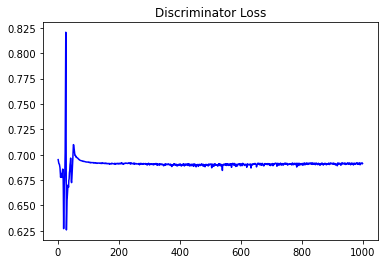

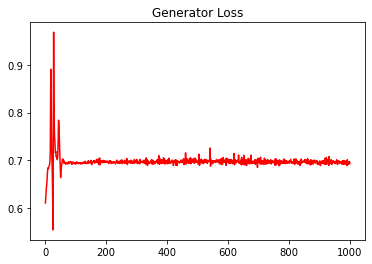

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.4447542450633973


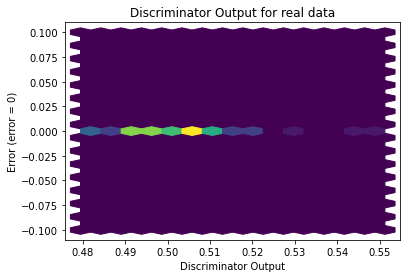

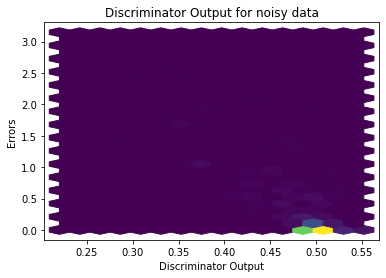

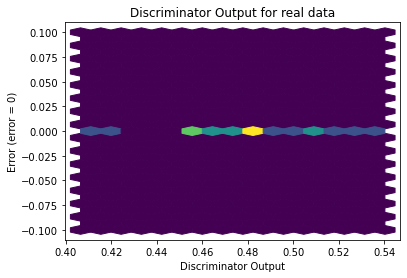

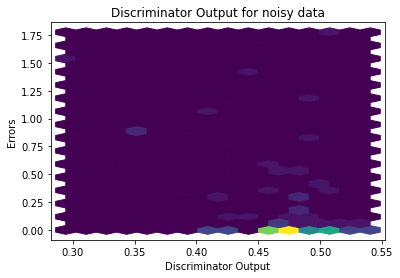

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


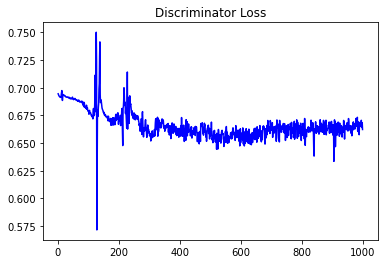

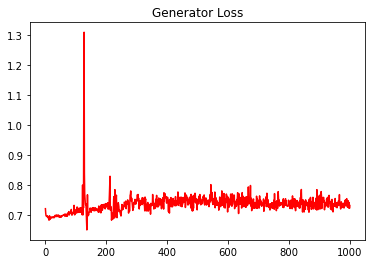

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.44936319341395786


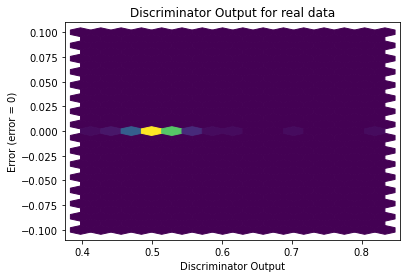

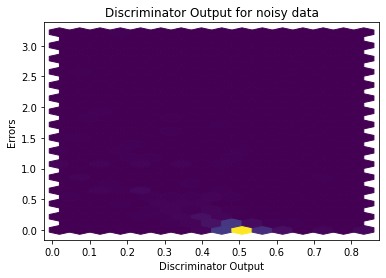

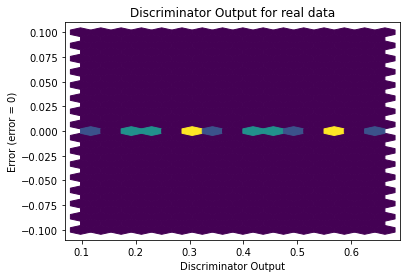

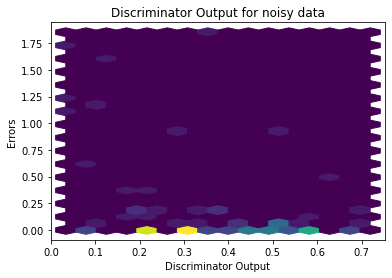

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1162]], requires_grad=True)
